# WeatherPy
----



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

622


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url  and unit variables

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# empyt lists

city_name = []
city_id = []
cloudiness = []
country = []
date = []
humidity = []
lats = []
lngs = []
temp = []
windspeed = []

# loop through cities and perform request for data
cities = cities[0:50] #delete this line after done debugging
i = 1
for city in cities:
    city = city
    
    response = requests.get(query_url + city).json()
   
    
    try:
        
        city_name.append(response["name"])
        city_id.append(response["id"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        windspeed.append(response["wind"]["speed"]) 
        i+=1
        #print(f"City: {city}, City ID: {response["id"]}")
        #print(response["id"])
        id = response["id"]
        print(f"City: {city}, City ID: {id}")
    
        
    except (KeyError):
        print("City not found...")


City: samfya, City ID: 899274
City: port macquarie, City ID: 2152659
City: hilo, City ID: 5855927
City not found...
City: tuktoyaktuk, City ID: 6170031
City: bathsheba, City ID: 3374083
City: cermik, City ID: 318766
City: kaitangata, City ID: 2208248
City: camacha, City ID: 2270385
City: victoria, City ID: 1819729
City not found...
City: vaini, City ID: 4032243
City: henties bay, City ID: 3356832
City: linxia, City ID: 1803331
City: caravelas, City ID: 3466980
City: upernavik, City ID: 3418910
City: ushuaia, City ID: 3833367
City: rikitea, City ID: 4030556
City: tambacounda, City ID: 2244991
City: manoel urbano, City ID: 3663495
City: hobart, City ID: 2163355
City: bocanda, City ID: 2291383
City: kahului, City ID: 5847411
City: esil, City ID: 1524296
City not found...
City not found...
City: komatipoort, City ID: 988290
City: sabang, City ID: 1214026
City: severo-kurilsk, City ID: 2121385
City: kalmunai, City ID: 1242110
City: banda aceh, City ID: 1215502
City: matagami, City ID: 60677

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe of data

weather_df = pd.DataFrame({"City": city_name,
                           "City ID": city_id,
                           "Cloudiness": cloudiness,
                           "Country": country,
                           "Date": date, 
                           "Humidity": humidity, 
                           "Lat": lats, 
                           "Lng": lngs, 
                           "Max Temp": temp, 
                           "Wind Speed": windspeed})

# Export data into .csv

weather_df.to_csv("/Users/anishachaudhari/Desktop/output_files.csv", encoding="utf-8", index=False)

# Display dataframe
weather_df.head(5)



,City,City ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Samfya,899274,0,ZM,1659314190,58,-11.3649,29.5565,58.24,6.06
1,Port Macquarie,2152659,100,AU,1659314106,59,-31.4333,152.9167,63.70,8.14
2,Hilo,5855927,0,US,1659313938,67,19.7297,-155.0900,86.29,13.80
3,Tuktoyaktuk,6170031,40,CA,1659314190,48,69.4541,-133.0374,64.40,3.44
4,Bathsheba,3374083,40,BB,1659314029,90,13.2167,-59.5167,83.01,19.57


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
weather_df["Humidity_100"] = weather_df["Humidity"].apply(lambda x : 1 if x > 100 else 0)


In [6]:
# iterate through results for each city in cities if humidity > 100%

filter_criteria = weather_df["Humidity_100"] > 100
fc_df = weather_df[filter_criteria]

print(fc_df.shape)
fc_df

(0, 11)


,City,City ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Humidity_100


In [7]:
#  Get the indices of cities that have humidity over 100%.
#  No cities with humidty over 100%
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

weather_humid_df = weather_df[weather_df["Humidity_100"] ==0]


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

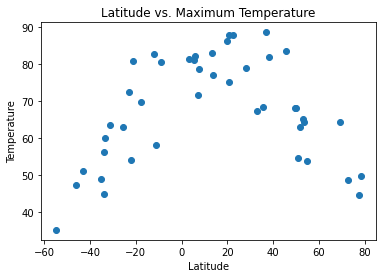

In [8]:
# Create a Scatter Plot for latitude vs temp

x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Maximum Temperature")
plt.show()

## Latitude vs. Humidity Plot

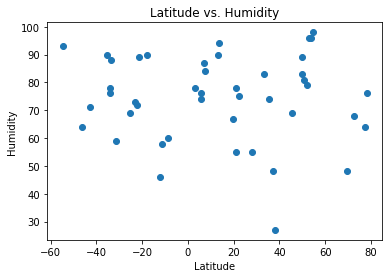

In [9]:
# Create a Scatter Plot for temperature vs latitude

x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

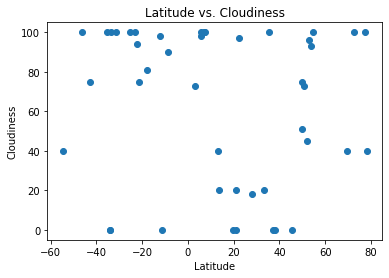

In [10]:
# Create a Scatter Plot for temperature vs cloudiness

x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

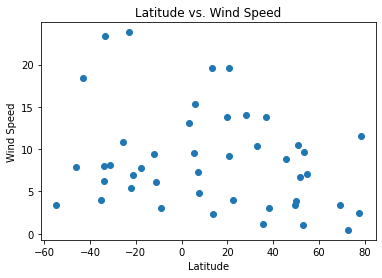

In [11]:
# Create a Scatter Plot for temperature vs windspeed

x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs. Wind Speed")
plt.show()


## Linear Regression

In [12]:
# Create hemispheres

northern_df = weather_df.loc[weather_df["Lat"]>=0]
southern_df = weather_df.loc[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.44x +87.64
The r-value is: 0.6244947813723347


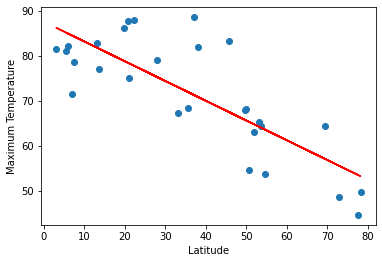

In [13]:
# Perform a linear regression on temperature vs. latitude
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.86x +85.11
The r-value is: 0.6623463497007688


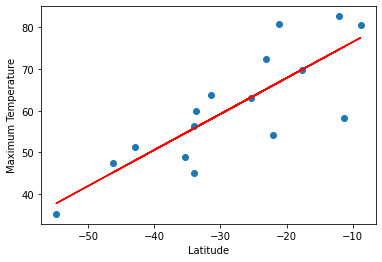

In [22]:
# Perform a linear regression on temperature vs. latitude
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.08x +77.46
The r-value is: 0.011029768358686817


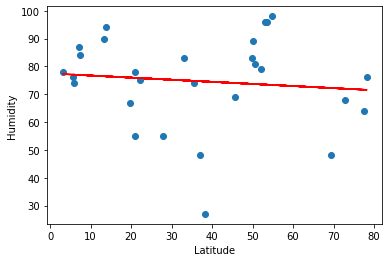

In [21]:
# Perform a linear regression on humidity vs. latitude
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.47x +60.07
The r-value is: 0.19661332463235257


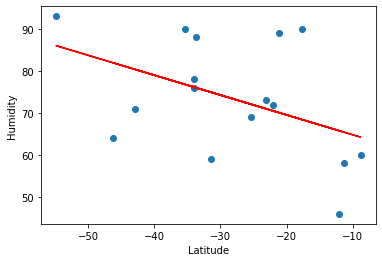

In [16]:
# Perform a linear regression on humidity vs. latitude
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.11x +53.28
The r-value is: 0.0037352584863728218


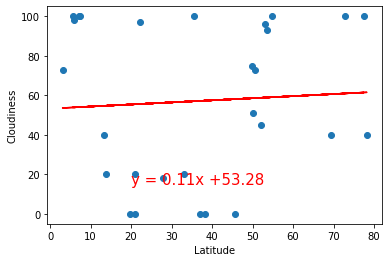

In [17]:
# Perform a linear regression on humidity vs. latitude
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.28x +79.98
The r-value is: 0.008704454467341558


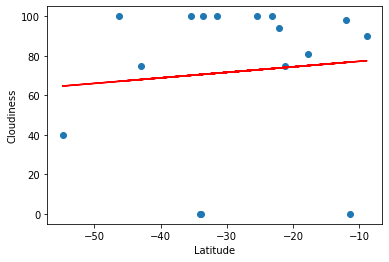

In [18]:
# Perform a linear regression on humidity vs. latitude
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.1x +11.92
The r-value is: 0.18512318731096492


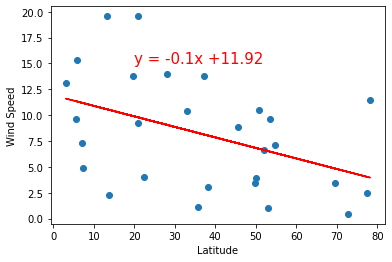

In [19]:
# Perform a linear regression on humidity vs. latitude
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.04x +8.27
The r-value is: 0.00794184391034043


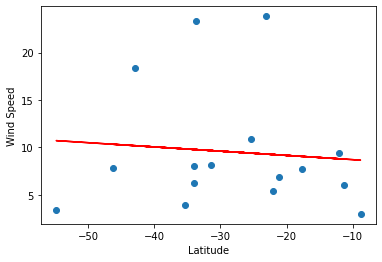

In [20]:
# Perform a linear regression on humidity vs. latitude
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()